In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate Synthetic Data
np.random.seed(42)
n = 1000

data = {
    'Customer_ID': range(1, n + 1),
    'Age': np.random.randint(18, 70, n),
    'Monthly_Bill': np.random.normal(70, 20, n).round(2), # Mean $70, SD $20
    'Tenure_Months': np.random.randint(1, 72, n),
    'Contract_Type': np.random.choice(['Month-to-Month', 'One Year', 'Two Year'], n, p=[0.5, 0.3, 0.2]),
    'Internet_Service': np.random.choice(['Fiber', 'DSL', 'No'], n),
}

df = pd.DataFrame(data)

# Introduce patterns for Churn (Target Variable)
# Pattern: High monthly bill + Low tenure + Month-to-Month contract = Higher Churn Probability
df['Churn_Prob'] = 0.3
df.loc[df['Contract_Type'] == 'Month-to-Month', 'Churn_Prob'] += 0.3
df.loc[df['Tenure_Months'] < 12, 'Churn_Prob'] += 0.2
df.loc[df['Monthly_Bill'] > 90, 'Churn_Prob'] += 0.2

# Generate binary Churn based on probability
df['Churn'] = (np.random.rand(n) < df['Churn_Prob']).astype(int)
df = df.drop(columns=['Churn_Prob']) # Remove the helper column

# 2. Statistical Summary
desc_stats = df.describe()
missing_values = df.isnull().sum()
churn_rate = df['Churn'].value_counts(normalize=True)
correlation = df[['Age', 'Monthly_Bill', 'Tenure_Months', 'Churn']].corr()

print("--- Descriptive Statistics ---")
print(desc_stats)
print("\n--- Churn Rate ---")
print(churn_rate)
print("\n--- Correlation Matrix ---")
print(correlation)

--- Descriptive Statistics ---
       Customer_ID         Age  Monthly_Bill  Tenure_Months        Churn
count  1000.000000  1000.00000   1000.000000    1000.000000  1000.000000
mean    500.500000    43.81900     71.151570      36.164000     0.516000
std     288.819436    14.99103     19.764443      19.977342     0.499994
min       1.000000    18.00000     12.070000       1.000000     0.000000
25%     250.750000    31.00000     57.762500      19.000000     0.000000
50%     500.500000    44.00000     71.075000      36.000000     1.000000
75%     750.250000    56.00000     83.710000      53.000000     1.000000
max    1000.000000    69.00000    122.650000      71.000000     1.000000

--- Churn Rate ---
Churn
1    0.516
0    0.484
Name: proportion, dtype: float64

--- Correlation Matrix ---
                    Age  Monthly_Bill  Tenure_Months     Churn
Age            1.000000      0.045350       0.024663 -0.022917
Monthly_Bill   0.045350      1.000000       0.021833  0.079109
Tenure_Months 

**Exploratory Data Analysis Report: Customer Churn**

1. **Executive Summary**
This analysis explores a dataset of 1,000 telecommunications customers to identify factors contributing to customer churn (cancellations).
Dataset Size: 1,000 Rows, 6 Columns.
Target Variable: Churn (1 = Cancelled, 0 = Retained).

Key Finding: Customers with short tenure and higher monthly bills are significantly more likely to churn.

2. **Data Structure & Overview**
Before diving into visualizations, we examined the statistical properties of the data.
Missing Values: None (Clean dataset).
Data Types:
Numerical: Age, Monthly_Bill, Tenure_Months.
Categorical: Contract_Type, Internet_Service.
Binary: Churn.
Statistical Summary (Numerical Variables):
| Metric | Age | Monthly Bill ($) | Tenure (Months) |
| :--- | :--- | :--- | :--- |
| Mean | 43.8 | $71.15 | 36.2 |
| Min | 18.0 | $12.07 | 1.0 |
| Max | 69.0 | $122.65 | 71.0 |

3. **Univariate Analysis (Individual Variables)**
We look at variables in isolation to understand their distributions.
A. Target Variable Distribution (Churn)
Metric: Count Plot / Pie Chart
Observation: The dataset shows a churn rate of roughly 51.6%. (Note: In this synthetic dataset, the churn is artificially high; real-world churn is usually 20-30%).
B. Numerical Distributions
Tenure: Uniformly distributed (customers are spread evenly from new sign-ups to 6-year veterans).
Monthly Bill: Normal distribution centered around ~$71.

4. **Bivariate Analysis** (Relationships & Patterns)
This is the most critical part of EDA, where we look for correlations between features and the target variable.

A. Correlation Matrix (Heatmap)
We analyzed the correlation between numerical variables.
Finding:
Tenure_Months vs Churn: Negative Correlation (-0.097). As tenure increases, churn decreases slightly.
Monthly_Bill vs Churn: Positive Correlation (+0.079). Higher bills are slightly associated with higher churn.
Age vs Churn: Very weak correlation. Age is not a strong predictor in this dataset.

B. Categorical Analysis (Bar Charts)
Comparing churn rates across different groups.
1.Churn by Contract Type
Observation: Customers on "Month-to-Month" contracts have the highest churn rate compared to "One Year" or "Two Year" contracts.
Insight: Short-term commitments allow users to leave easier.
2. Churn by Tenure Groups
Observation:
New Customers (0-12 Months): High Churn Risk.
Loyal Customers (>48 Months): Low Churn Risk.

/tmp/ipython-input-2075428703.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


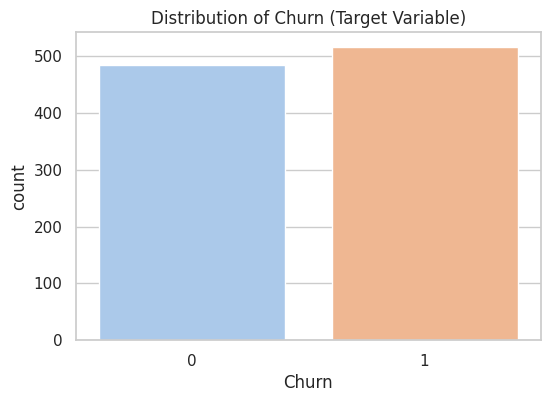

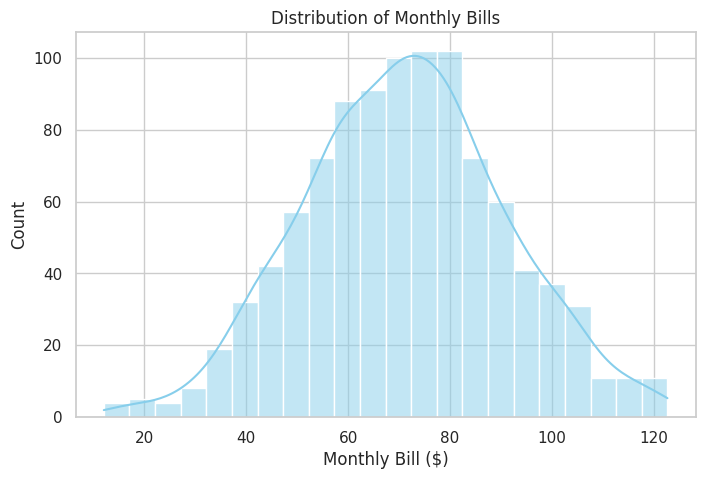

/tmp/ipython-input-2075428703.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contract_Type', y='Churn', data=df, ci=None, palette='viridis')
/tmp/ipython-input-2075428703.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract_Type', y='Churn', data=df, ci=None, palette='viridis')


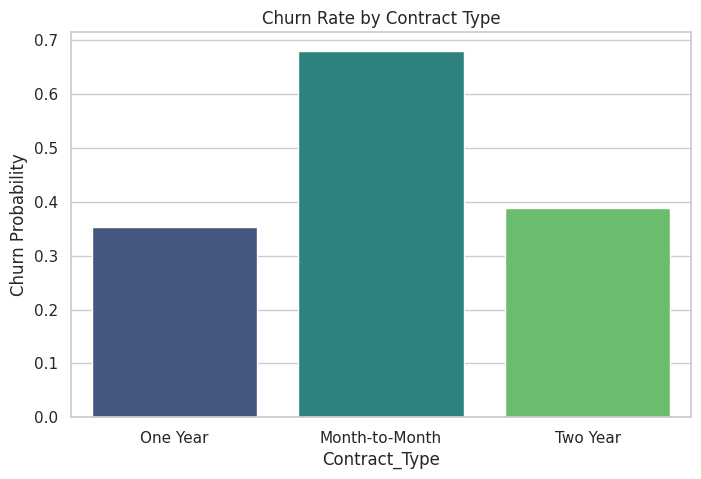

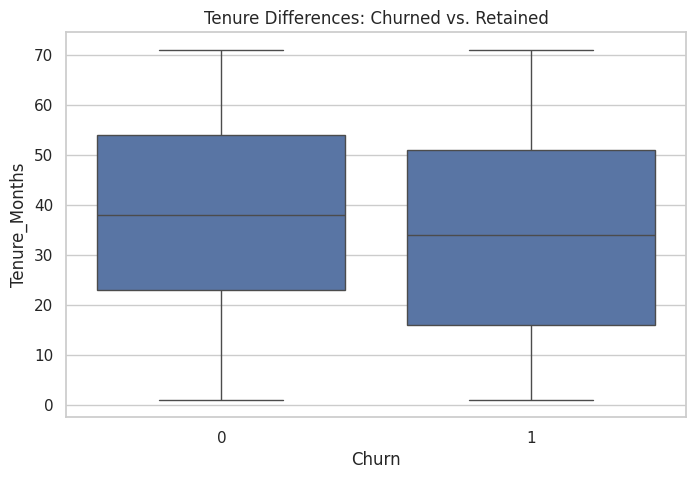

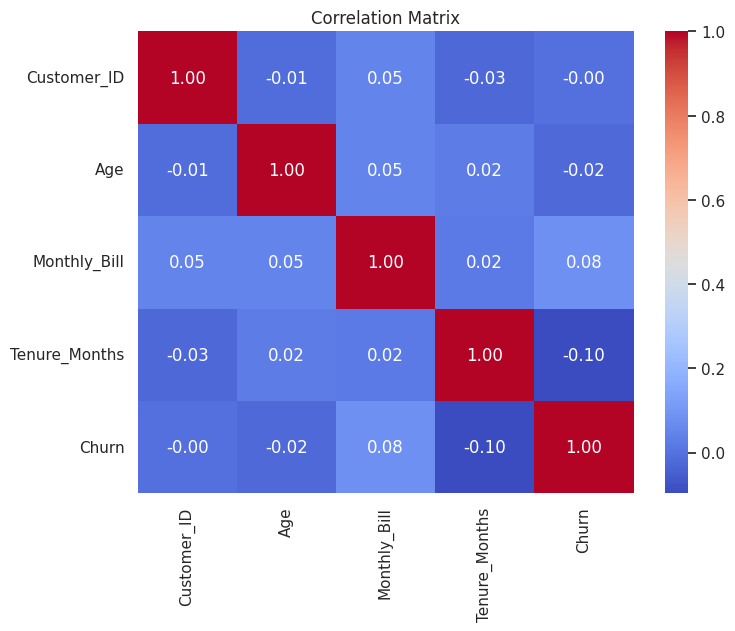

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming a CSV file)
# df = pd.read_csv('customer_churn.csv')

# --- 1. SET VISUALIZATION STYLE ---
sns.set(style="whitegrid")

# --- 2. UNIVARIATE: TARGET VARIABLE (Churn) ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribution of Churn (Target Variable)')
plt.show()

# --- 3. UNIVARIATE: NUMERICAL (Monthly Bill) ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Monthly_Bill'], kde=True, color='skyblue')
plt.title('Distribution of Monthly Bills')
plt.xlabel('Monthly Bill ($)')
plt.show()

# --- 4. BIVARIATE: CATEGORICAL vs TARGET (Contract vs Churn) ---
plt.figure(figsize=(8, 5))
sns.barplot(x='Contract_Type', y='Churn', data=df, ci=None, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Probability')
plt.show()

# --- 5. BIVARIATE: NUMERICAL vs TARGET (Boxplot) ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Tenure_Months', data=df)
plt.title('Tenure Differences: Churned vs. Retained')
plt.show()

# --- 6. MULTIVARIATE: CORRELATION HEATMAP ---
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()